# Task 3: Exploring Unsupervised Machine Learning 

Objective of the task: In this task we have to predict the optimum number of clusters (using K-means clustering) and represent it visually.

Dataset used: The classic "Iris Dataset" has been used for finding the ptimum number of clusters. The Iris flower data set (or Fisher's Iris dataset) is a multivariate dataset introduced by Ronald Fisher in 1936 as an example of linear discriminant analysis. The dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These species are pictured below:

(Iris setosa) 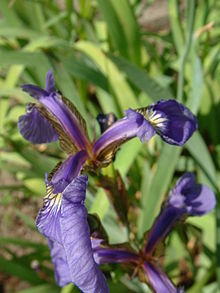

(Iris versicolor) 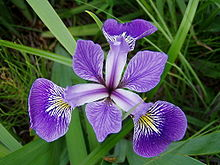

(Iris virginica) 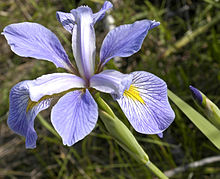

# Importing Libraries and the dataset

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing and reading the Iris dataset
data=pd.read_csv('iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Checking for missing values in the dataset
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
#Checking structure of dataset
data.shape

(150, 6)

In [6]:
#Checking the columns within the dataset
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Elbow method for determining value of 'k' for K-means clustering

Straightforward and the most commonly used method of determining the right value of k is the "ELBOW METHOD". The plot used for determining the right value of k is identical to the shape of human elbow, thus, the name. Just like a human elbow bends at an angle,the plot for determining the value of k also bends at an angle:

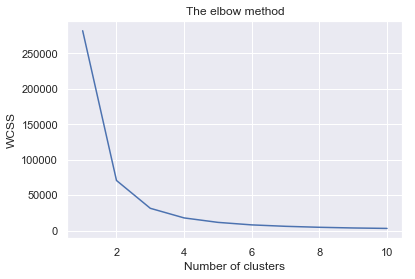

In [14]:
# Finding the optimum number of clusters for k-means classification
x = data.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
# Within cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Plotting the results onto a line graph and allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimum number of clusters is where the elbow is getting formed. The value of 'k' is chosen where the error is minimum on the plot.
Therefore, the number of clusters (i.e. the value of k) chosen from this plot = 3.

# K-Means Clustering

In [15]:
#Creating the kmeans classifier for k-means clustering
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

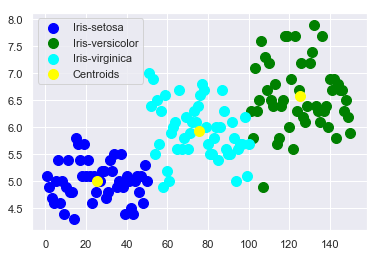

In [16]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'green', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'cyan', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

# Conclusion of the task

Therefore, we have predicted the optimum number of clusters and implemented k-means clustering on the Iris dataset.